Perform sentiment analysis on the amazon alexa reviews.

Data - https://drive.google.com/file/d/1IOn6weCqhlbIvo2FVAPNkrwIOQC5Nhd2/view?usp=sharing

Hint - Data is TSV format (research and solve).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_table("/content/alexa_reviews.tsv")
df

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1
...,...,...,...
3145,3145,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,"Listening to music, searching locations, check...",1
3147,3147,"I do love these things, i have them running my...",1
3148,3148,Only complaint I have is that the sound qualit...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   verified_reviews  3150 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.0+ KB


In [ ]:
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
df.isna().sum()

Unnamed: 0          0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
blanks =[]

for i, un, rv, fd in df.itertuples():
  if(type(rv)==str):
    if(rv.isspace()):
      blanks.append(i)

blanks

[85,
 183,
 219,
 374,
 406,
 524,
 654,
 780,
 878,
 914,
 1094,
 1112,
 1119,
 1150,
 1151,
 1275,
 1321,
 1354,
 1360,
 1385,
 1389,
 1420,
 1447,
 1461,
 1513,
 1558,
 1577,
 1581,
 1614,
 1728,
 1761,
 1764,
 1808,
 1954,
 1975,
 1981,
 1987,
 2014,
 2019,
 2032,
 2037,
 2048,
 2073,
 2104,
 2107,
 2131,
 2141,
 2187,
 2197,
 2221,
 2244,
 2359,
 2430,
 2455,
 2510,
 2525,
 2567,
 2627,
 2628,
 2662,
 2732,
 2763,
 2769,
 2772,
 2775,
 2790,
 2806,
 2861,
 2876,
 2918,
 2978,
 2979,
 3013,
 3083,
 3114,
 3120,
 3123,
 3126,
 3141]

In [ ]:
df.drop(blanks,inplace=True)

In [ ]:
from wordcloud import WordCloud

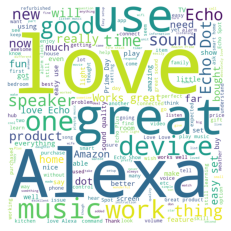

In [ ]:
wc = WordCloud(width = 800, height=800, background_color="white",min_font_size=10)
wc.generate(" ".join(df[df["feedback"]==1]["verified_reviews"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

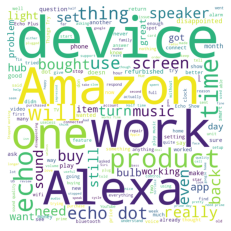

In [ ]:
wc = WordCloud(width = 800, height=800, background_color="white",min_font_size=10)
wc.generate(" ".join(df[df["feedback"]==0]["verified_reviews"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def cleantext(text):
  token = word_tokenize(text.lower())
  ftoken = [t for t in token if(t.isalpha())]

  stop = stopwords.words("english")
  ctoken = [t for t in ftoken if(t not in stop)]

  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]

  return " ".join(ltoken)

In [ ]:
df["verified_reviews"] = df["verified_reviews"].apply(cleantext)

In [ ]:
df

,Unnamed: 0,verified_reviews,feedback
0,0,love echo,1
1,1,loved,1
2,2,sometimes playing game answer question correct...,1
3,3,lot fun thing yr old learns dinosaur control l...,1
4,4,music,1
...,...,...,...
3145,3145,perfect kid adult everyone,1
3146,3146,listening music searching location checking ti...,1
3147,3147,love thing running entire home tv light thermo...,1
3148,3148,complaint sound quality great mostly use comma...,1


In [ ]:
x=df["verified_reviews"]
y=df["feedback"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
sentlen = []

for sent in df["verified_reviews"]:
  sentlen.append(len(word_tokenize(sent)))
df["sentlen"] = sentlen

In [ ]:
max_len = np.quantile(sentlen,0.95)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
tok = Tokenizer(char_level=False,split=" ")
tok.fit_on_texts(xtrain)
vocab_len = len(tok.index_word)
vocab_len

3149

In [ ]:
seqtrain = tok.texts_to_sequences(xtrain)
seqmattrain = sequence.pad_sequences(seqtrain,int(max_len))
seqmattrain

array([[   0,    0,    0, ...,  126, 1341, 1082],
       [   0,    0,    0, ...,    0,    0,   16],
       [   0,    0,    0, ...,    0,    1,  317],
       ...,
       [   0,    0,    0, ...,  403,  804, 3149],
       [   0,    0,    0, ...,   31,  205,    1],
       [   0,    0,    0, ..., 1840,   82,  971]], dtype=int32)

In [ ]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM,Embedding

In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=16, activation="tanh"))
rnn.add(Dense(units=16, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=30, epochs=10)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/10
82/82 [==============================] - 7s 51ms/step - loss: 0.4116
Epoch 2/10
82/82 [==============================] - 4s 50ms/step - loss: 0.2098
Epoch 3/10
82/82 [==============================] - 4s 51ms/step - loss: 0.0751
Epoch 4/10
82/82 [==============================] - 4s 50ms/step - loss: 0.0249
Epoch 5/10
82/82 [==============================] - 4s 49ms/step - loss: 0.0113
Epoch 6/10
82/82 [==============================] - 4s 51ms/step - loss: 0.0101
Epoch 7/10
82/82 [==============================] - 4s 54ms/step - loss: 0.0064
Epoch 8/10
82/82 [==============================] - 4s 52ms/step - loss: 0.0054
Epoch 9/10
82/82 [==============================] - 4s 51ms/step - loss: 0.0056
Epoch 10/10
82/82 [==============================] - 4s 54ms/step - loss: 0.0044


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        45
           1       0.96      0.99      0.97       570

    accuracy                           0.95       615
   macro avg       0.89      0.71      0.77       615
weighted avg       0.95      0.95      0.94       615



In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(LSTM(units=16, activation="tanh"))
rnn.add(Dense(units=16, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=30, epochs=10)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/10
82/82 [==============================] - 14s 80ms/step - loss: 0.3964
Epoch 2/10
82/82 [==============================] - 5s 65ms/step - loss: 0.1816
Epoch 3/10
82/82 [==============================] - 5s 66ms/step - loss: 0.0828
Epoch 4/10
82/82 [==============================] - 5s 66ms/step - loss: 0.0305
Epoch 5/10
82/82 [==============================] - 5s 66ms/step - loss: 0.0153
Epoch 6/10
82/82 [==============================] - 5s 65ms/step - loss: 0.0155
Epoch 7/10
82/82 [==============================] - 5s 66ms/step - loss: 0.0109
Epoch 8/10
82/82 [==============================] - 5s 67ms/step - loss: 0.0088
Epoch 9/10
82/82 [==============================] - 6s 68ms/step - loss: 0.0060
Epoch 10/10
82/82 [==============================] - 5s 67ms/step - loss: 0.0055


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63        45
           1       0.96      0.99      0.98       570

    accuracy                           0.96       615
   macro avg       0.89      0.75      0.80       615
weighted avg       0.95      0.96      0.95       615

